In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\Car_Purchasing_Data.csv',encoding='ISO-8859-1')

In [14]:
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.25050,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89292,9572.95714,530973.90780,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15290,53798.55112,11160.35506,638467.17730,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.03798,14426.16485,548599.05240,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15130,5358.71218,560304.06710,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.46251,71942.40291,6995.90252,541670.10160,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.64200,56039.49793,12301.45679,360419.09880,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.94350,68888.77805,10611.60686,764531.32030,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.16051,49811.99062,14013.03451,337826.63820,45442.15353


In [17]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.25050,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89292,9572.95714,530973.90780,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15290,53798.55112,11160.35506,638467.17730,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.03798,14426.16485,548599.05240,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15130,5358.71218,560304.06710,55915.46248


In [16]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [18]:
Y=data["Car Purchase Amount"]

In [19]:
X=data[[ "Gender", "Age","Annual Salary","Credit Card Debt", "Net Worth"]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=400)

In [35]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))
print('Testing Data Count: {}'.format(y_test.shape[0]))
print('Training Data Count: {}'.format(y_train.shape[0]))

Training Data Count: 400
Testing Data Count: 100
Testing Data Count: 100
Training Data Count: 400


In [36]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 4.338e+09
Date:                 Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                         01:52:35   Log-Likelihood:                -721.85
No. Observations:                  400   AIC:                             1456.
Df Residuals:                      394   BIC:                             1480.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.215e+04      0.644  -6.55e+04      0.000   -4.21e+04   -4.21e+04
Gender              -0.1209      0.149     -0.813      0.417      -0.413       0.172
Age                841.5617      0.009   9.22e+04      0.000     841.544     841.580
Annual Salary        0.5623   6.28e-06   8.96e+04      0.000       0.562       0.562
Credit Card Debt -5.881e-06   2.12e-05     -0.277      0.782   -4.76e-05    3.59e-05
Net Worth            0.0290   4.23e-07   6.84e+04      0.000       0.029       0.029
==============================================================================
Omnibus:                        0.328   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.328
Skew:                          -0.069   Prob(JB):                        0.849
Kurtosis:                       2.971   Cond. No.                     4.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

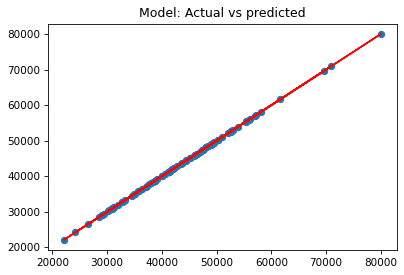

In [37]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.title("Model: Actual vs predicted")
plt.show()

In [38]:
lrm=LinearRegression()

In [39]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400, 6) (100, 6) (400,) (100,)


In [40]:
lrm.fit(X_train,y_train)

LinearRegression()

In [41]:
lrm.predict(X_test)

array([52993.50920711, 35914.06645378, 42210.38766928, 41914.69584836,
       46084.42662718, 43680.20523274, 70879.38019524, 38400.109649  ,
       31979.68793507, 31250.9685266 , 33130.35648918, 22090.68108721,
       46891.87639257, 50933.56117645, 37076.89091314, 28465.17117386,
       58044.88980348, 38761.78134418, 31146.61523696, 39132.70591843,
       37742.14666407, 42289.61050243, 56066.99561997, 52707.0095172 ,
       30840.4141845 , 46389.99169746, 52056.69664843, 41264.66646966,
       24182.93523192, 34518.87176494, 28999.2967742 , 45113.65249971,
       48516.38519601, 48901.00866206, 42747.87067253, 61594.25583986,
       35716.81798083, 33259.7289643 , 48100.28288403, 38042.92577157,
       29093.52276383, 45207.58375534, 47869.16691182, 31087.37539228,
       44419.08930006, 30395.88515576, 55377.01724577, 43504.1406875 ,
       48465.07618477, 56973.6146541 , 55419.91586413, 44436.81768532,
       36366.97212545, 79997.94550821, 49081.5904819 , 53047.90403563,
      

In [42]:
lrm.score(X_train,y_train) #accuracy

0.9999999818367444

In [43]:
print(y_test,lrm.predict(X_test))

74    52991.52667
278   35911.64559
209   42209.28948
121   41913.53713
361   46082.80993
          ...    
470   69669.47402
437   34922.42846
139   32700.27871
69    49392.88970
7     47434.98265
Name: Car Purchase Amount, Length: 100, dtype: float64 [52993.50920711 35914.06645378 42210.38766928 41914.69584836
 46084.42662718 43680.20523274 70879.38019524 38400.109649
 31979.68793507 31250.9685266  33130.35648918 22090.68108721
 46891.87639257 50933.56117645 37076.89091314 28465.17117386
 58044.88980348 38761.78134418 31146.61523696 39132.70591843
 37742.14666407 42289.61050243 56066.99561997 52707.0095172
 30840.4141845  46389.99169746 52056.69664843 41264.66646966
 24182.93523192 34518.87176494 28999.2967742  45113.65249971
 48516.38519601 48901.00866206 42747.87067253 61594.25583986
 35716.81798083 33259.7289643  48100.28288403 38042.92577157
 29093.52276383 45207.58375534 47869.16691182 31087.37539228
 44419.08930006 30395.88515576 55377.01724577 43504.1406875
 48465.07618477 569

In [24]:
<----------------------------------------------------------->
<----------------------------------------------------------->

SyntaxError: invalid syntax (<ipython-input-24-679d8bdf409b>, line 1)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.25050,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89292,9572.95714,530973.90780,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15290,53798.55112,11160.35506,638467.17730,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.03798,14426.16485,548599.05240,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15130,5358.71218,560304.06710,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.46251,71942.40291,6995.90252,541670.10160,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.64200,56039.49793,12301.45679,360419.09880,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.94350,68888.77805,10611.60686,764531.32030,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.16051,49811.99062,14013.03451,337826.63820,45442.15353


In [28]:
data.drop('Customer e-mail',axis='columns',inplace=True)

In [29]:
data.dtypes

Customer Name           object
Country                 object
Gender                   int64
Age                    float64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [31]:
data.rename(columns = {'Annual Salary':'annualsalary','Credit Card Debt':'ccd','Net Worth':'networth','Car Purchase Amount':'cpa'},inplace=True)

In [32]:
 data.head()

,Customer Name,Country,Gender,Age,annualsalary,ccd,networth,cpa
0,Martina Avila,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.25050,35321.45877
1,Harlan Barnes,Belize,0,40.87062,66646.89292,9572.95714,530973.90780,45115.52566
2,Naomi Rodriquez,Algeria,1,43.15290,53798.55112,11160.35506,638467.17730,42925.70921
3,Jade Cunningham,Cook Islands,1,58.27137,79370.03798,14426.16485,548599.05240,67422.36313
4,Cedric Leach,Brazil,1,57.31375,59729.15130,5358.71218,560304.06710,55915.46248


In [33]:
data.networth.values

array([ 238961.2505 ,  530973.9078 ,  638467.1773 ,  548599.0524 ,
        560304.0671 ,  428485.3604 ,  326373.1812 ,  629312.4041 ,
        630059.0274 ,  476643.3544 ,  612738.6171 ,  293862.5123 ,
        430907.1673 ,  420322.0702 ,  146344.8965 ,  481433.4324 ,
        370356.2223 ,  549443.5886 ,  431098.9998 ,  566022.1306 ,
        480588.2345 ,  307226.0977 ,  497526.4566 ,  688466.0503 ,
        499086.3442 ,  429440.3297 ,  315775.3207 ,  341691.9337 ,
        188032.0778 ,  583230.976  ,  319837.6593 ,  486069.073  ,
        655934.4666 ,  487435.964  ,  215673.5384 ,  612242.7755 ,
        430624.8142 ,  326742.7352 ,  213040.9606 ,  379749.9152 ,
        513340.0097 ,  410655.9947 ,  348833.8403 ,  299734.1278 ,
        497950.2933 ,  853913.8532 ,  320228.6451 ,  158979.7102 ,
        390312.1715 ,  527420.7269 ,  451846.1995 ,  779925.7892 ,
        455609.1429 ,  583523.0762 ,  353757.5057 ,  438067.7506 ,
        468238.7915 ,  636407.1148 ,  409419.5797 ,  286062.51

In [34]:
pd.to_numeric(data.networth,errors='coerce').isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: networth, Length: 500, dtype: bool

In [36]:
data[pd.to_numeric(data.networth,errors='coerce').isnull()].shape

(0, 8)